In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\Users\Administrator\Desktop\Data Science project\archive\UEFA Champions League 2016-2022 Data.xlsx'

In [3]:
goals = pd.read_excel(path, sheet_name = 'goals')
managers = pd.read_excel(path, sheet_name = 'managers')
matches = pd.read_excel(path, sheet_name = 'matches')
players = pd.read_excel(path, sheet_name = 'players')
stadiums = pd.read_excel(path, sheet_name = 'stadiums')
teams = pd.read_excel(path, sheet_name = 'teams')

In [4]:
# function for changing columns to lower case
def lower(df):
    df.columns = df.columns.str.lower()
    return df

In [5]:
# Applying function for every dataframe
goal = lower(goals)
match = lower(matches)
stadium = lower(stadiums)
player = lower(players)
manager = lower(managers)
team = lower(teams)

In [6]:
matches['result'] = 'D'  # Set default value as 'D' (draw)

# Update result based on home_team_score and away_team_score
matches.loc[matches['home_team_score'] > matches['away_team_score'], 'result'] = 'W'
matches.loc[matches['home_team_score'] < matches['away_team_score'], 'result'] = 'L'


In [7]:
matches['season'] = matches['season'].apply(lambda x: int(x.split('-')[0]))

In [8]:
match["date_time"] = pd.to_datetime(match["date_time"], format="%d-%b-%y %I.%M.%S.%f000000 %p")

In [9]:
 # Convert date column to timestamp
matches['timestamp'] = matches['date_time'].apply(lambda x: x.timestamp())

In [10]:
match.dtypes

match_id                     object
season                        int64
date_time            datetime64[ns]
home_team                    object
away_team                    object
stadium                      object
home_team_score               int64
away_team_score               int64
penalty_shoot_out             int64
attendance                    int64
result                       object
timestamp                   float64
dtype: object

In [11]:
matches.rename(columns={'home_team': 'team', 'away_team': 'opponent'}, inplace=True)


In [12]:
matches['opp_code'] = matches['opponent'].astype("category").cat.codes

In [13]:
matches["day_code"]=matches["date_time"].dt.dayofweek

In [14]:
matches['venue_code'] = np.where(matches['team']==matches['team'], 1, 0)


In [15]:
matches["target"] = matches["result"].map({"W": 1, "L": 2, "D": 0}).astype("int")


In [16]:
target = "target"

# Create a dictionary to keep track of each team's win count
team_wins = {}

# Loop through each match
for i, match in matches.iterrows():

    # Get home and away team names and match result
    home_team = match['team']
    away_team = match['opponent']
    result = match['result']

    # Update home team's win count
    if result == "W":
        if home_team not in team_wins:
            team_wins[home_team] = 0
        team_wins[home_team] += 1

    # Update away team's win count
    elif result == "L":
        if away_team not in team_wins:
            team_wins[away_team] = 0
        team_wins[away_team] += 1

# Create a new DataFrame with total wins for each team
team_wins_df = pd.DataFrame({'team': list(team_wins.keys()), 'total_wins': list(team_wins.values())})



In [17]:
from sklearn.model_selection import train_test_split

In [18]:
matches = pd.merge(matches, team_wins_df, on='team', how='left')

In [19]:
# Merge the team_wins_df DataFrame with the train and test DataFrames on the team name
#train = pd.merge(matches, team_wins_df, on='team', how='left')
#test = pd.merge(matches, team_wins_df, on='team', how='left')

In [20]:
matches['total_wins'] = matches['total_wins'].fillna(method='ffill')

In [21]:
# Group data by team name and calculate most goals scored by that team
matches['total_goals'] = matches['home_team_score'].groupby(matches['team']).transform('sum')


In [22]:
# Count number of appearances for each team in the dataset
appearances = matches['team'].value_counts()

In [23]:
# Add new feature 'appearances' to the matches dataframe
matches['appearances'] = matches['team'].map(appearances)

In [24]:
matches.head(10)

,match_id,season,date_time,team,opponent,stadium,home_team_score,away_team_score,penalty_shoot_out,attendance,result,timestamp,opp_code,day_code,venue_code,target,total_wins,total_goals,appearances
0,mt1,2021,2021-09-15 20:00:00,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,W,1.631736e+09,55,2,1,1,40.0,83,32
1,mt2,2021,2021-09-15 20:00:00,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546,D,1.631736e+09,53,2,1,0,4.0,9,15
2,mt3,2021,2021-09-28 20:00:00,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350,W,1.632859e+09,45,1,1,1,31.0,67,27
3,mt4,2021,2021-09-28 20:00:00,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500,L,1.632859e+09,19,1,1,2,14.0,26,16
4,mt5,2021,2021-10-19 17:45:00,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915,L,1.634666e+09,45,1,1,2,4.0,9,15
5,mt6,2021,2021-10-19 20:00:00,Paris Saint-Germain,RB Leipzig,Parc des Princes,3,2,0,47359,W,1.634674e+09,55,1,1,1,31.0,67,27
6,mt7,2021,2021-11-03 20:00:00,RB Leipzig,Paris Saint-Germain,Red Bull Arena,2,2,0,39794,D,1.635970e+09,53,2,1,0,14.0,26,16
7,mt8,2021,2021-11-03 20:00:00,Manchester City,Club Brugge KV,Etihad Stadium,4,1,0,50228,W,1.635970e+09,19,2,1,1,40.0,83,32
8,mt9,2021,2021-11-24 20:00:00,Manchester City,Paris Saint-Germain,Etihad Stadium,2,1,0,52030,W,1.637784e+09,53,2,1,1,40.0,83,32
9,mt10,2021,2021-11-24 20:00:00,Club Brugge KV,RB Leipzig,Jan Breydel Stadion,0,5,0,24072,L,1.637784e+09,55,2,1,2,4.0,9,15


In [25]:
train=matches[matches["date_time"]< '2022-06-01']

In [26]:
test = matches[matches["date_time"] > '2016-01-01']

In [27]:
# Define the predictors
predictors = ["venue_code", "opp_code", "day_code", "total_wins", "total_goals", "appearances"]

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train[predictors] = imputer.fit_transform(train[predictors])
test[predictors] = imputer.transform(test[predictors])

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, min_samples_split=8, random_state=1)


In [104]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=8, n_estimators=50, random_state=1)

In [105]:
preds=rf.predict(test[predictors])

In [106]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test["target"], preds)
print("Accuracy:", accuracy)


Accuracy: 0.7647849462365591


In [107]:
result_df = pd.concat([test['target'], pd.Series(preds, name='predicted', index=test.index)], axis=1)
print(result_df)

     target  predicted
0         1          1
1         0          2
2         1          1
3         2          1
4         2          2
..      ...        ...
739       1          1
740       2          2
741       1          1
742       1          1
743       2          2

[744 rows x 2 columns]


In [108]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(test["target"], preds)
print(cm)


[[ 69  49  41]
 [  9 298  20]
 [  5  51 202]]


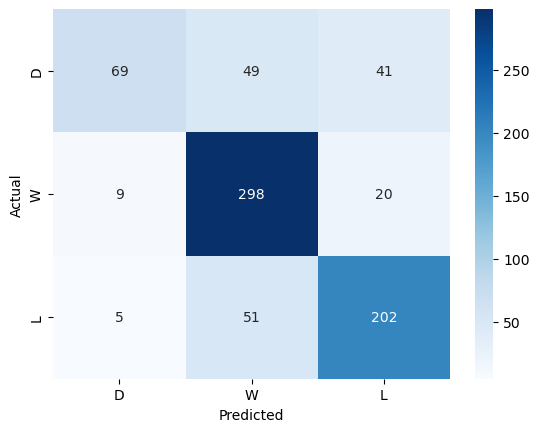

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["D", "W", "L"], yticklabels=["D", "W", "L"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [110]:
combined=pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [111]:
pd.crosstab(index=combined["actual"], columns= combined["prediction"])

prediction,0,1,2
actual,,,
0,69,49,41
1,9,298,20
2,5,51,202


In [112]:
from sklearn.metrics import precision_score

precision = precision_score(test["target"], preds, average='weighted', zero_division=1)
print("Precision Score: {:.2f}".format(precision))


Precision Score: 0.77


In [113]:
from sklearn.metrics import f1_score

f1 = f1_score(test["target"], preds, average='weighted')
print("F1 Score: {:.2f}".format(f1))



F1 Score: 0.75


In [114]:
import joblib

filename = 'match_prediction_model_rf_test2.joblib'
joblib.dump(rf, filename)

['match_prediction_model_rf_test2.joblib']

In [115]:
matches.head()

,match_id,season,date_time,team,opponent,stadium,home_team_score,away_team_score,penalty_shoot_out,attendance,result,timestamp,opp_code,day_code,venue_code,target,total_wins,total_goals,appearances
0,mt1,2021,2021-09-15 20:00:00,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,W,1.631736e+09,55,2,1,1,40.0,83,32
1,mt2,2021,2021-09-15 20:00:00,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546,D,1.631736e+09,53,2,1,0,4.0,9,15
2,mt3,2021,2021-09-28 20:00:00,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350,W,1.632859e+09,45,1,1,1,31.0,67,27
3,mt4,2021,2021-09-28 20:00:00,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500,L,1.632859e+09,19,1,1,2,14.0,26,16
4,mt5,2021,2021-10-19 17:45:00,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915,L,1.634666e+09,45,1,1,2,4.0,9,15


In [116]:
matches.to_csv('matches.csv', index=False)


In [71]:
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import GridSearchCV

# define the parameter grid to search over
param_grid = {'max_depth': [3, 5, 7, 9], 'learning_rate': [0.001, 0.01, 0.1, 1]}

# create a gradient boosting classifier
gbc = GradientBoostingClassifier()

# create the grid search object
gs = GridSearchCV(gbc, param_grid, cv=5)

In [73]:
# Fit the randomized search object to the data
#gs.fit(train[predictors], train["target"])

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 5, 7, 9]})

In [ ]:
# extract the results of the grid search
#results = gs.cv_results_


In [ ]:
#plot the results of the grid search
plt.figure(figsize=(10, 5))
plt.title("Grid Search Results for Gradient Boosting Classifier")
plt.xlabel("max_depth")
plt.ylabel("learning_rate")
plt.imshow(results['mean_test_score'].reshape(4, 4), cmap='viridis', interpolation='nearest')
plt.xticks(range(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(range(len(param_grid['learning_rate'])), param_grid['learning_rate'])
plt.colorbar()
plt.show()